<a href="https://colab.research.google.com/github/Murthy-Kolluru/modelthinking/blob/main/ModelthinkingCh3Searching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Fibonnacci with and without memoization

def fibonacci_without_memoization(n):
    if n <= 1:
        return n
    else:
        return fibonacci_without_memoization(n-1) + fibonacci_without_memoization(n-2)

memo = {}

def fibonacci_with_memoization(n):
    if n <= 1:
        return n
    elif n not in memo:
        memo[n] = fibonacci_with_memoization(n-1) + fibonacci_with_memoization(n-2)
    return memo[n]

import time

# Test without memoization
start_time = time.time()
fibonacci_without_memoization_result = fibonacci_without_memoization(35)
end_time = time.time()
print(f"Without Memoization: Result - {fibonacci_without_memoization_result}, Time - {end_time - start_time} seconds")

# Test with memoization
start_time = time.time()
fibonacci_with_memoization_result = fibonacci_with_memoization(35)
end_time = time.time()
print(f"With Memoization: Result - {fibonacci_with_memoization_result}, Time - {end_time - start_time} seconds")


Without Memoization: Result - 9227465, Time - 2.22418475151062 seconds
With Memoization: Result - 9227465, Time - 6.914138793945312e-05 seconds


In [ ]:
#Shortest path
import itertools
import random
import time

def generate_random_graph(n_layers, n_nodes):
    graph = {}
    for layer in range(1, n_layers):
        for node in range(1, n_nodes + 1):
            options = random.sample(range(1, n_nodes + 1), n_nodes)
            graph[(layer, node)] = options
    return graph

def calculate_path_cost(graph, path, distances):
    total_cost = 0
    for i in range(len(path) - 1):
        total_cost += distances.get((path[i], path[i + 1]), 0)  # Use get to handle missing keys
    return total_cost

def shortest_path(graph, distances):
    n_layers = max(layer for layer, _ in graph.keys())
    n_nodes = max(node for _, node in graph.keys())

    # Initialize a memoization table to store the shortest path lengths
    memo = [['Not_updated'] * (n_nodes + 1) for _ in range(n_layers + 1)]

    # Base case: the shortest path to the destination from the last layer is zero
    for node in range(1, n_nodes + 1):
        memo[n_layers][node] = 0

    computations = 0

    # Dynamic programming to compute shortest paths
    for layer in range(n_layers - 1, 0, -1):
        for node in range(1, n_nodes + 1):
            for option in graph[(layer, node)]:
                option_cost = distances[(layer, node)] + memo[layer + 1][option]
                if memo[layer][node] == 'Not_updated':
                    memo[layer][node] = option_cost
                else:
                    memo[layer][node] = min(memo[layer][node], option_cost)
                computations += 1

    # Find the minimum distance from the starting point to any node in the first layer
    min_distance = min(memo[1][start_node] for start_node in range(1, n_nodes + 1))

    return memo, computations, min_distance

def brute_force_shortest_path(graph, distances):
    n_layers = max(layer for layer, _ in graph.keys())
    n_nodes = max(node for _, node in graph.keys())

    # Generate all possible paths
    all_paths = list(itertools.product(range(1, n_nodes + 1), repeat=n_layers))

    min_cost = float('inf')
    best_path = None

    computations = 0

    # Iterate through all possible paths
    for path in all_paths:
        cost = calculate_path_cost(graph, path, distances)
        computations += 1

        if cost < min_cost and cost > 0:  # Exclude paths with zero cost
            min_cost = cost
            best_path = path

    return computations, min_cost, best_path

# Example usage:
n_layers = 8
n_nodes_per_layer = 10
graph = generate_random_graph(n_layers, n_nodes_per_layer)

# Generate random distances uniformly for both solutions
distances = {(layer, node): random.randint(1, 10) for layer in range(1, n_layers + 1) for node in range(1, n_nodes_per_layer + 1)}

# Use the same distances for both solutions
start_time_dp = time.time()
memo, computations_dp, result_dp = shortest_path(graph, distances)
end_time_dp = time.time()

# Brute Force
start_time_bf = time.time()
computations_bf, result_bf, _ = brute_force_shortest_path(graph, distances)
end_time_bf = time.time()

# Print results
print("Dynamic Programming:")
print("Number of computations:", computations_dp)
print("Shortest Distance:", result_dp)
print("Execution Time:", end_time_dp - start_time_dp)

print("\nBrute Force:")
print("Number of computations:", computations_bf)
print("Shortest Distance:", result_bf)
print("Execution Time:", end_time_bf - start_time_bf)


Dynamic Programming:
Number of computations: 600
Shortest Distance: 6
Execution Time: 0.0007109642028808594

Brute Force:
Number of computations: 10000000
Shortest Distance: 1
Execution Time: 19.848275423049927


In [ ]:
#Knapsack Small
import random

class Product:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

# Initialize 4 products
products = []

for i in range(1, 5):
    weight = random.randint(1, 5)
    value = random.randint(1, 5)
    product = Product(f"Product{i}", weight, value)
    products.append(product)

# Print product details
for product in products:
    print(f"{product.name}: Weight - {product.weight}, Value - {product.value}")



Product1: Weight - 1, Value - 2
Product2: Weight - 2, Value - 4
Product3: Weight - 2, Value - 3
Product4: Weight - 1, Value - 2


In [ ]:
#Knapsack Bruteforce
import itertools

class Product:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

# Function to calculate total value and weight for a subset of products
def calculate_subset_properties(subset):
    total_weight = sum(product.weight for product in subset)
    total_value = sum(product.value for product in subset)
    return total_weight, total_value

# Initialize 4 products
products = [
    Product("Product1", 1, 2),
    Product("Product2", 2, 4),
    Product("Product3", 2, 3),
    Product("Product4", 1, 2),
]

# Target weight limit
max_weight = 5

# Brute-force approach to find the best combination
best_value = 0
best_subset = None

# Generate all possible subsets
for subset in itertools.chain.from_iterable(itertools.combinations(products, r) for r in range(len(products) + 1)):
    subset_weight, subset_value = calculate_subset_properties(subset)

    # Check if the subset is within the weight limit and has the maximum value
    if subset_weight <= max_weight and subset_value > best_value:
        best_value = subset_value
        best_subset = subset

# Print the solution
print("Selected Products:")
for product in best_subset:
    print(f"{product.name}: Weight - {product.weight}, Value - {product.value}")

print(f"Total Weight: {calculate_subset_properties(best_subset)[0]}")
print(f"Total Value: {best_value}")


Selected Products:
Product1: Weight - 1, Value - 2
Product2: Weight - 2, Value - 4
Product3: Weight - 2, Value - 3
Total Weight: 5
Total Value: 9


In [ ]:
#DP Knapsack
class Product:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

def knapsack_dynamic_programming(products, max_weight):
    n = len(products)
    dp = [[0] * (max_weight + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(max_weight + 1):
            if products[i - 1].weight <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - products[i - 1].weight] + products[i - 1].value)
            else:
                dp[i][w] = dp[i - 1][w]

    # Reconstruct the solution
    selected_products = []
    i, j = n, max_weight
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_products.append(products[i - 1])
            j -= products[i - 1].weight
        i -= 1

    return selected_products, dp[n][max_weight]

# Previous products with unique weights and values
products = [
    Product("Product1", 1, 2),
    Product("Product2", 2, 4),
    Product("Product3", 2, 3),
    Product("Product4", 1, 2),
]

# Target weight limit
max_weight = 5

selected_products, total_value = knapsack_dynamic_programming(products, max_weight)

# Print the solution
print("Selected Products:")
for product in selected_products:
    print(f"{product.name}: Weight - {product.weight}, Value - {product.value}")

print(f"Total Weight: {sum(product.weight for product in selected_products)}")
print(f"Total Value: {total_value}")


Selected Products:
Product3: Weight - 2, Value - 3
Product2: Weight - 2, Value - 4
Product1: Weight - 1, Value - 2
Total Weight: 5
Total Value: 9


In [ ]:
#Working of DP
class Product:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

def knapsack_dynamic_programming(products, max_weight):
    n = len(products)
    dp = [[0] * (max_weight + 1) for _ in range(n + 1)]

    print("Initial Memoization Matrix:")
    for row in dp:
        print(row)

    for i in range(1, n + 1):
        for w in range(max_weight + 1):
            if products[i - 1].weight <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - products[i - 1].weight] + products[i - 1].value)
            else:
                dp[i][w] = dp[i - 1][w]

        print(f"\nAfter processing product {i}:")
        for row in dp:
            print(row)

    # Reconstruct the solution
    selected_products = []
    i, j = n, max_weight
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_products.append(products[i - 1])
            j -= products[i - 1].weight
        i -= 1

    return selected_products, dp[n][max_weight]

# Previous products with unique weights and values
products = [
    Product("Product1", 1, 2),
    Product("Product2", 2, 4),
    Product("Product3", 2, 3),
    Product("Product4", 1, 2),
]

# Target weight limit
max_weight = 5

selected_products, total_value = knapsack_dynamic_programming(products, max_weight)

# Print the solution
print("\nFinal Selected Products:")
for product in selected_products:
    print(f"{product.name}: Weight - {product.weight}, Value - {product.value}")

print(f"Total Weight: {sum(product.weight for product in selected_products)}")
print(f"Total Value: {total_value}")


Initial Memoization Matrix:
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]

After processing product 1:
[0, 0, 0, 0, 0, 0]
[0, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]

After processing product 2:
[0, 0, 0, 0, 0, 0]
[0, 2, 2, 2, 2, 2]
[0, 2, 4, 6, 6, 6]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]

After processing product 3:
[0, 0, 0, 0, 0, 0]
[0, 2, 2, 2, 2, 2]
[0, 2, 4, 6, 6, 6]
[0, 2, 4, 6, 7, 9]
[0, 0, 0, 0, 0, 0]

After processing product 4:
[0, 0, 0, 0, 0, 0]
[0, 2, 2, 2, 2, 2]
[0, 2, 4, 6, 6, 6]
[0, 2, 4, 6, 7, 9]
[0, 2, 4, 6, 8, 9]

Final Selected Products:
Product3: Weight - 2, Value - 3
Product2: Weight - 2, Value - 4
Product1: Weight - 1, Value - 2
Total Weight: 5
Total Value: 9


In [ ]:
#10 item set Brute force and Dynamic programming
import itertools
import random
import time

class Product:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

# Function to calculate total value and weight for a subset of products
def calculate_subset_properties(subset):
    total_weight = sum(product.weight for product in subset)
    total_value = sum(product.value for product in subset)
    return total_weight, total_value

# Brute-force approach to solve the knapsack problem
def knapsack_bruteforce(items, max_weight):
    best_value_bruteforce = 0
    best_subset_bruteforce = None

    start_time = time.time()

    for subset in itertools.chain.from_iterable(itertools.combinations(items, r) for r in range(len(items) + 1)):
        subset_weight, subset_value = calculate_subset_properties(subset)

        if subset_weight <= max_weight and subset_value > best_value_bruteforce:
            best_value_bruteforce = subset_value
            best_subset_bruteforce = subset

    end_time = time.time()
    elapsed_time = end_time - start_time

    return best_subset_bruteforce, best_value_bruteforce, elapsed_time

# Dynamic programming approach to solve the knapsack problem
def knapsack_dynamic_programming(items, max_weight):
    n = len(items)
    dp = [[0] * (max_weight + 1) for _ in range(n + 1)]

    start_time = time.time()

    for i in range(1, n + 1):
        for w in range(max_weight + 1):
            if items[i - 1].weight <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - items[i - 1].weight] + items[i - 1].value)
            else:
                dp[i][w] = dp[i - 1][w]

    selected_items = []
    i, j = n, max_weight
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_items.append(items[i - 1])
            j -= items[i - 1].weight
        i -= 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    return selected_items, dp[n][max_weight], elapsed_time

# Generate 10 items with weights between 2 to 7 Kg and values between 5 to 15
items = []
for i in range(1, 26):
    weight = random.randint(2, 7)
    value = random.randint(5, 15)
    item = Product(f"Item{i}", weight, value)
    items.append(item)

# Print items, weights, and values
print("Items:")
for item in items:
    print(f"{item.name}: Weight - {item.weight} Kg, Value - {item.value}")

# Solve the knapsack problem using brute-force
max_weight_bruteforce = 30
selected_items_bruteforce, total_value_bruteforce, time_bruteforce = knapsack_bruteforce(items, max_weight_bruteforce)

# Solve the knapsack problem using dynamic programming
selected_items_dynamic, total_value_dynamic, time_dynamic = knapsack_dynamic_programming(items, max_weight_bruteforce)

# Print the solutions
print("\nBrute-force Solution:")
print("Selected Items:")
for item in selected_items_bruteforce:
    print(f"{item.name}: Weight - {item.weight} Kg, Value - {item.value}")
print(f"Total Weight: {calculate_subset_properties(selected_items_bruteforce)[0]} Kg")
print(f"Total Value: {total_value_bruteforce}")
print(f"Time: {time_bruteforce:.6f} seconds")

print("\nDynamic Programming Solution:")
print("Selected Items:")
for item in selected_items_dynamic:
    print(f"{item.name}: Weight - {item.weight} Kg, Value - {item.value}")
print(f"Total Weight: {sum(item.weight for item in selected_items_dynamic)} Kg")
print(f"Total Value: {total_value_dynamic}")
print(f"Time: {time_dynamic:.6f} seconds")


Items:
Item1: Weight - 3 Kg, Value - 13
Item2: Weight - 7 Kg, Value - 9
Item3: Weight - 3 Kg, Value - 14
Item4: Weight - 6 Kg, Value - 7
Item5: Weight - 7 Kg, Value - 14
Item6: Weight - 6 Kg, Value - 5
Item7: Weight - 2 Kg, Value - 7
Item8: Weight - 4 Kg, Value - 9
Item9: Weight - 5 Kg, Value - 6
Item10: Weight - 2 Kg, Value - 6
Item11: Weight - 4 Kg, Value - 15
Item12: Weight - 6 Kg, Value - 9
Item13: Weight - 5 Kg, Value - 14
Item14: Weight - 4 Kg, Value - 6
Item15: Weight - 2 Kg, Value - 8
Item16: Weight - 4 Kg, Value - 9
Item17: Weight - 4 Kg, Value - 7
Item18: Weight - 2 Kg, Value - 10
Item19: Weight - 5 Kg, Value - 5
Item20: Weight - 2 Kg, Value - 9
Item21: Weight - 2 Kg, Value - 13
Item22: Weight - 6 Kg, Value - 13
Item23: Weight - 2 Kg, Value - 5
Item24: Weight - 2 Kg, Value - 12
Item25: Weight - 5 Kg, Value - 12

Brute-force Solution:
Selected Items:
Item1: Weight - 3 Kg, Value - 13
Item3: Weight - 3 Kg, Value - 14
Item7: Weight - 2 Kg, Value - 7
Item10: Weight - 2 Kg, Value -

In [ ]:
#Dynamic programming, Montecarlo and Greedy
import random
import time

class Product:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

# Function to calculate total value and weight for a subset of products
def calculate_subset_properties(subset):
    total_weight = sum(product.weight for product in subset)
    total_value = sum(product.value for product in subset)
    return total_weight, total_value

# Dynamic programming approach to solve the knapsack problem
def knapsack_dynamic_programming(items, max_weight):
    n = len(items)
    dp = [[0] * (max_weight + 1) for _ in range(n + 1)]

    start_time = time.time()

    for i in range(1, n + 1):
        for w in range(max_weight + 1):
            if items[i - 1].weight <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - items[i - 1].weight] + items[i - 1].value)
            else:
                dp[i][w] = dp[i - 1][w]

    selected_items = []
    i, j = n, max_weight
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_items.append(items[i - 1])
            j -= items[i - 1].weight
        i -= 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    return selected_items, dp[n][max_weight], elapsed_time

# Monte Carlo solution
def knapsack_montecarlo(items, max_weight, iterations):
    max_value_montecarlo = 0
    best_subset_montecarlo = None

    start_time = time.time()

    for _ in range(iterations):
        subset = random.sample(items, random.randint(2, 16))
        subset_weight, subset_value = calculate_subset_properties(subset)

        if subset_weight <= max_weight and subset_value > max_value_montecarlo:
            max_value_montecarlo = subset_value
            best_subset_montecarlo = subset

    end_time = time.time()
    elapsed_time = end_time - start_time

    return best_subset_montecarlo, max_value_montecarlo, elapsed_time

# Greedy search solution
def knapsack_greedy(items, max_weight):
    items_sorted = sorted(items, key=lambda x: (x.value, -x.weight), reverse=True)
    selected_items = []
    current_weight = 0

    start_time = time.time()

    for item in items_sorted:
        if current_weight + item.weight <= max_weight:
            selected_items.append(item)
            current_weight += item.weight

    end_time = time.time()
    elapsed_time = end_time - start_time

    return selected_items, calculate_subset_properties(selected_items)[1], elapsed_time

# Generate 100,000 items with weights between 2 to 10 Kg and values between 5 to 15
items_large = []
for i in range(1, 1000001):
    weight = random.randint(2, 15)
    value = random.randint(100, 1000) #Later try with 100000 to 10000000
    item = Product(f"Item{i}", weight, value)
    items_large.append(item)

# Print items, weights, and values for the large set
print("\nLarge Set of Items:")
for item in items_large[:5]:
    print(f"{item.name}: Weight - {item.weight} Kg, Value - {item.value}")

# Solve the knapsack problem using dynamic programming
max_weight_dynamic = 30
selected_items_dynamic, total_value_dynamic, time_dynamic = knapsack_dynamic_programming(items_large, max_weight_dynamic)

# Monte Carlo solution
iterations_montecarlo = 1000000
selected_items_montecarlo, max_value_montecarlo, time_montecarlo = knapsack_montecarlo(items_large, max_weight_dynamic, iterations_montecarlo)

# Greedy search solution
selected_items_greedy, total_value_greedy, time_greedy = knapsack_greedy(items_large, max_weight_dynamic)

# Print the solutions and time taken
print("\nDynamic Programming Solution:")
print("Selected Items:")
for item in selected_items_dynamic:
    print(f"{item.name}: Weight - {item.weight} Kg, Value - {item.value}")
print(f"Total Weight: {sum(item.weight for item in selected_items_dynamic)} Kg")
print(f"Total Value: {total_value_dynamic}")
print(f"Time: {time_dynamic:.6f} seconds")

print("\nMonte Carlo Solution:")
print("Selected Items:")
for item in selected_items_montecarlo:
    print(f"{item.name}: Weight - {item.weight} Kg, Value - {item.value}")
print(f"Total Weight: {sum(item.weight for item in selected_items_montecarlo)} Kg")
print(f"Total Value: {max_value_montecarlo}")
print(f"Time: {time_montecarlo:.6f} seconds")

print("\nGreedy Search Solution:")
print("Selected Items:")
for item in selected_items_greedy:
    print(f"{item.name}: Weight - {item.weight} Kg, Value - {item.value}")
print(f"Total Weight: {sum(item.weight for item in selected_items_greedy)} Kg")
print(f"Total Value: {total_value_greedy}")
print(f"Time: {time_greedy:.6f} seconds")



Large Set of Items:
Item1: Weight - 2 Kg, Value - 419
Item2: Weight - 10 Kg, Value - 316
Item3: Weight - 7 Kg, Value - 634
Item4: Weight - 13 Kg, Value - 321
Item5: Weight - 3 Kg, Value - 123

Dynamic Programming Solution:
Selected Items:
Item168865: Weight - 2 Kg, Value - 1000
Item142141: Weight - 2 Kg, Value - 1000
Item126031: Weight - 2 Kg, Value - 1000
Item111437: Weight - 2 Kg, Value - 1000
Item74539: Weight - 2 Kg, Value - 1000
Item50277: Weight - 2 Kg, Value - 1000
Item44479: Weight - 2 Kg, Value - 1000
Item43591: Weight - 2 Kg, Value - 1000
Item36554: Weight - 2 Kg, Value - 1000
Item36008: Weight - 2 Kg, Value - 1000
Item34769: Weight - 2 Kg, Value - 1000
Item26886: Weight - 2 Kg, Value - 1000
Item12173: Weight - 2 Kg, Value - 1000
Item9902: Weight - 2 Kg, Value - 1000
Item3639: Weight - 2 Kg, Value - 1000
Total Weight: 30 Kg
Total Value: 15000
Time: 21.620793 seconds

Monte Carlo Solution:
Selected Items:
Item495046: Weight - 5 Kg, Value - 913
Item574383: Weight - 5 Kg, Value

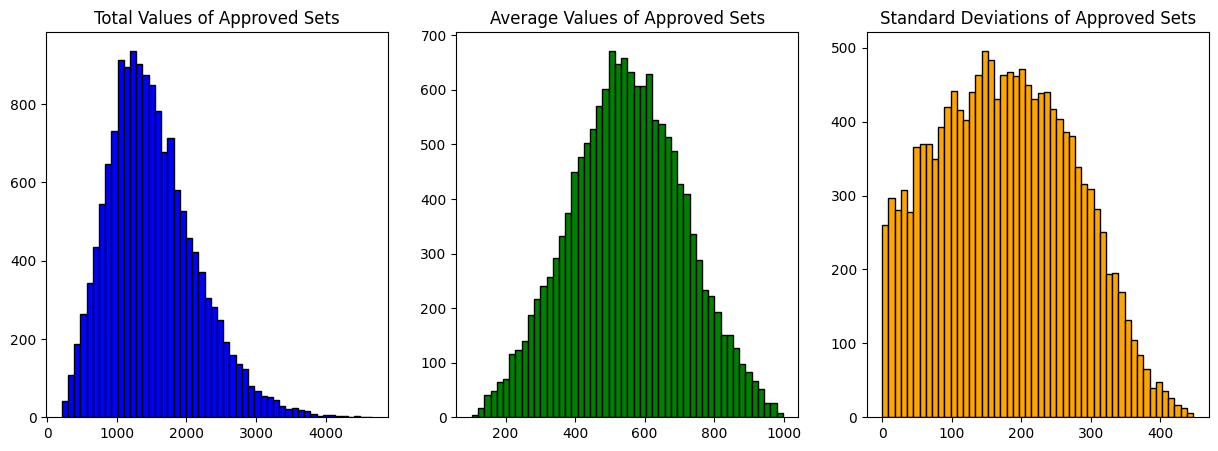

In [2]:
#Montecarlo distribution

import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Number of items
num_items = 1000000

# Generate random weights and values for items
weights = np.random.uniform(2, 15, num_items)
values = np.random.uniform(100, 1000, num_items)

# Number of iterations for creating sets
num_iterations = 100000

# Initialize lists to store results
total_values = []
average_values = []
std_dev_values = []

# Create item sets and evaluate
for _ in range(num_iterations):
    # Randomly choose the number of items in the set (between 2 and 15)
    num_selected_items = np.random.randint(2, 16)

    # Randomly select items
    selected_indices = np.random.choice(num_items, num_selected_items, replace=False)

    # Calculate total weight and value of the selected set
    total_weight = np.sum(weights[selected_indices])
    total_value = np.sum(values[selected_indices])

    # Check if the total weight is within the limit
    if total_weight <= 30:
        # Store values for approved sets
        total_values.append(total_value)
        average_values.append(np.mean(values[selected_indices]))
        std_dev_values.append(np.std(values[selected_indices]))

# Plot histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(total_values, bins=50, color='blue', edgecolor='black')
plt.title('Total Values of Approved Sets')

plt.subplot(1, 3, 2)
plt.hist(average_values, bins=50, color='green', edgecolor='black')
plt.title('Average Values of Approved Sets')

plt.subplot(1, 3, 3)
plt.hist(std_dev_values, bins=50, color='orange', edgecolor='black')
plt.title('Standard Deviations of Approved Sets')

plt.show()


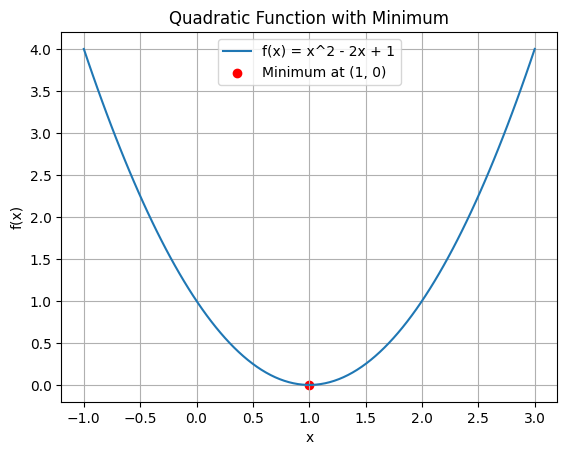

In [ ]:
#Univariate Maxima and Minima

import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function
def quadratic_function(x):
    return x**2 - 2*x + 1

# Generate x values
x_values = np.linspace(-1, 3, 100)

# Compute corresponding y values
y_values = quadratic_function(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = x^2 - 2x + 1')
plt.scatter(1, 0, color='red', marker='o', label='Minimum at (1, 0)')
plt.title('Quadratic Function with Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


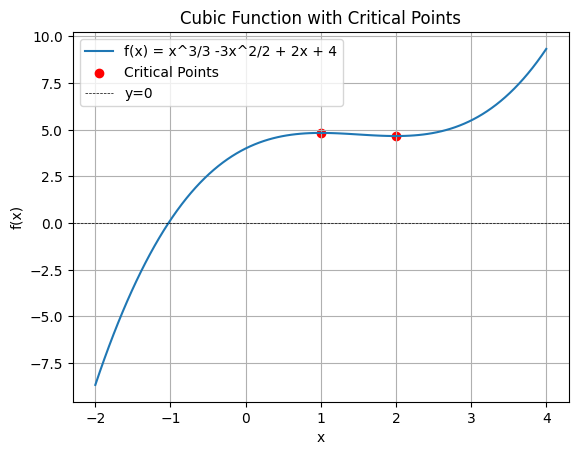

In [ ]:
#Local Minima and Local Maxima
import numpy as np
import matplotlib.pyplot as plt

# Define the cubic function
def cubic_function(x):
    return (x**3) / 3 - (3 * x**2) / 2 + 2 * x + 4

# Define the derivative of the cubic function
def cubic_derivative(x):
    return x**2 - 3 * x + 2

# Find critical points by solving the derivative equal to zero
critical_points = np.roots([1, -3, 2])

# Generate x values
x_values = np.linspace(-2, 4, 100)

# Compute corresponding y values for the function and its derivative
y_values_cubic = cubic_function(x_values)
y_values_derivative = cubic_derivative(x_values)

# Plot the cubic function
plt.plot(x_values, y_values_cubic, label='f(x) = x^3/3 -3x^2/2 + 2x + 4')
plt.scatter(critical_points, cubic_function(critical_points), color='red', marker='o', label='Critical Points')
plt.title('Cubic Function with Critical Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='y=0')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Positive definitive
import numpy as np

# Example matrix
A = np.array([[4, -1, 2],
              [-1, 5, 0],
              [2, 0, 3]])

# Check for symmetry
is_symmetric = np.allclose(A, A.T)

if is_symmetric:
    # Check eigenvalues
    eigenvalues, _ = np.linalg.eig(A)

    if all(eig > 0 for eig in eigenvalues):
        print("The matrix is symmetric and positive definite.")
    else:
        print("The matrix is symmetric but not positive definite.")
else:
    print("The matrix is not symmetric. Positive definiteness is not applicable.")


The matrix is symmetric and positive definite.


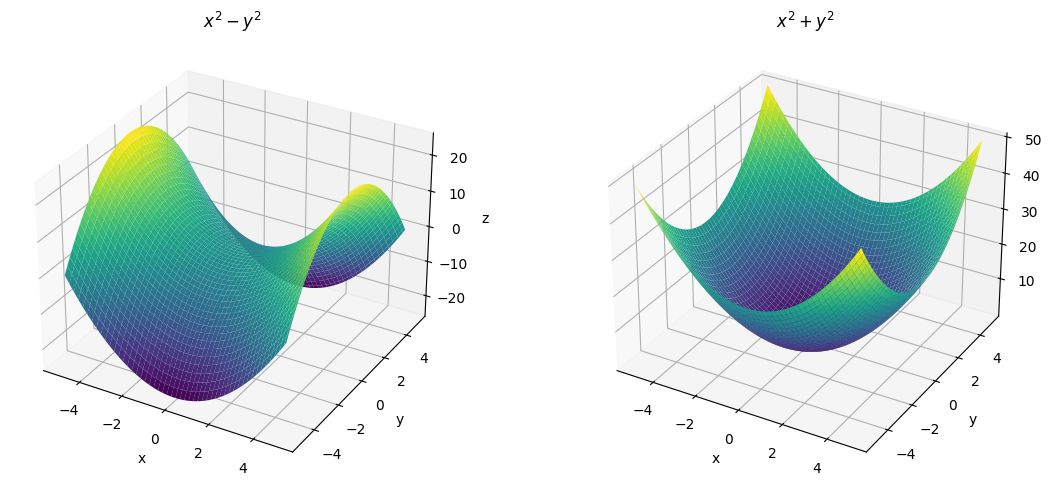

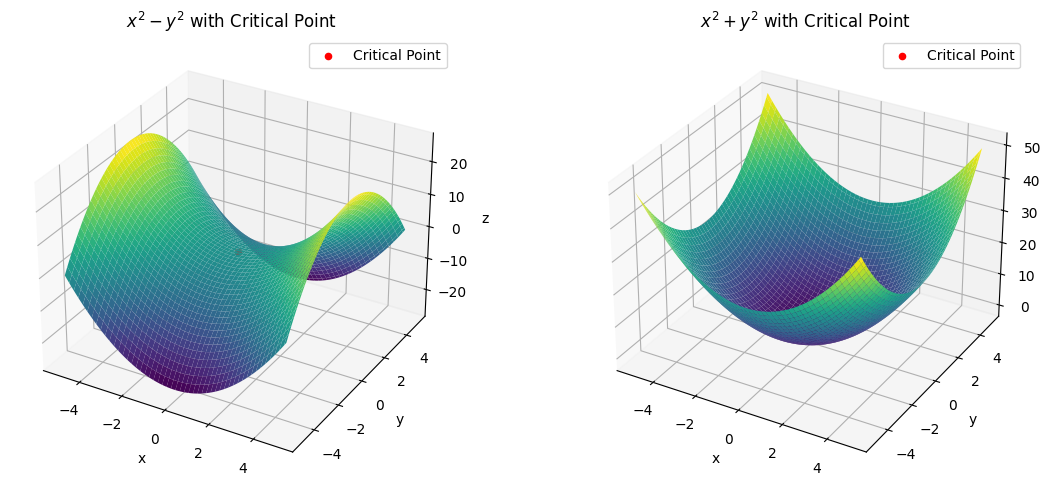

In [ ]:
#Saddle points
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions
def function1(x, y):
    return x**2 - y**2

def function2(x, y):
    return x**2 + y**2

# Generate x and y values
x_values = np.linspace(-5, 5, 100)
y_values = np.linspace(-5, 5, 100)

# Create a meshgrid for x and y
x, y = np.meshgrid(x_values, y_values)

# Compute z values for the functions
z1 = function1(x, y)
z2 = function2(x, y)

# Plot the functions in 3D
fig = plt.figure(figsize=(12, 5))

# Plot for x^2 - y^2
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z1, cmap='viridis')
ax1.set_title('$x^2 - y^2$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Plot for x^2 + y^2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z2, cmap='viridis')
ax2.set_title('$x^2 + y^2$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

plt.tight_layout()
plt.show()

# Compute and plot critical points
critical_point_x1 = 0
critical_point_y1 = 0
critical_point_z1 = function1(critical_point_x1, critical_point_y1)

critical_point_x2 = 0
critical_point_y2 = 0
critical_point_z2 = function2(critical_point_x2, critical_point_y2)

# Plot the critical points on 3D plots
fig = plt.figure(figsize=(12, 5))

# Plot for x^2 - y^2
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z1, cmap='viridis')
ax1.scatter(critical_point_x1, critical_point_y1, critical_point_z1, color='red', marker='o', label='Critical Point')
ax1.set_title('$x^2 - y^2$ with Critical Point')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.legend()

# Plot for x^2 + y^2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z2, cmap='viridis')
ax2.scatter(critical_point_x2, critical_point_y2, critical_point_z2, color='red', marker='o', label='Critical Point')
ax2.set_title('$x^2 + y^2$ with Critical Point')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.legend()

plt.tight_layout()
plt.show()



In [30]:
#A higher dimensional problem
import sympy as sp
import numpy as np

# Define the variables
x, y, z = sp.symbols('x y z')

# Define the function
f = x**2 + 2*y*z - 3*x*y + 4*z**2

# Compute the gradient
gradient = [sp.diff(f, var) for var in (x, y, z)]

# Compute the Hessian matrix
hessian = sp.hessian(f, (x, y, z))

# Solve for critical points by solving the gradient equations
critical_points = sp.solve(gradient, (x, y, z))

# Print results with formatted matrices
print("Function:", f)
print("\nGradient:")
sp.pprint(gradient)
print("\nHessian Matrix:")
sp.pprint(hessian)
print("\nCritical Points:", critical_points)



Function: x**2 - 3*x*y + 2*y*z + 4*z**2

Gradient:
[2⋅x - 3⋅y, -3⋅x + 2⋅z, 2⋅y + 8⋅z]

Hessian Matrix:
⎡2   -3  0⎤
⎢         ⎥
⎢-3  0   2⎥
⎢         ⎥
⎣0   2   8⎦

Critical Points: {x: 0, y: 0, z: 0}


In [35]:
#Positive definitive
import numpy as np

# Example matrix
A = np.array([[2, -3, 0],
              [-3, 0, 2],
              [0, 2, 8]])

# Check for symmetry
is_symmetric = np.allclose(A, A.T)

if is_symmetric:
    # Check eigenvalues
    eigenvalues, _ = np.linalg.eig(A)
    print(eigenvalues)
    print()

if all(eig > 0 for eig in eigenvalues):
    result = "minima"
    print("The matrix is symmetric and positive definite.")
elif all(eig < 0 for eig in eigenvalues):
    result = "maxima"
    print("The matrix is symmetric but not positive definite.")
else:
    result = "saddle"

print("Critical points are ", result)

[-2.42005092  3.86327014  8.55678078]

Critical points are  saddle
